In [1]:
import csv
from datetime import datetime
import pandas as pd

In [2]:
# Read the CSV file

data=pd.read_csv("eye_log31.csv" )

In [3]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

In [4]:
type(data['Timestamp'])

pandas.core.series.Series

In [5]:
from datetime import datetime 
blink_duration=[]
blink_count = 0
eye_state_before = 1
duration=0
check=0
blink_count=0
start_time = datetime.strptime("2023-10-11 14:27:33", "%Y-%m-%d %H:%M:%S")
end_time=0
index=1
y=datetime.strptime("2023-10-11 14:27:34", "%Y-%m-%d %H:%M:%S")
for eye_state in data['Eye State']:
    check=0
    if eye_state == 1 and eye_state_before==0:
        date= str(data.loc[index,('Timestamp')])
        start_time=datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    elif eye_state == 1 and eye_state_before==1:
        blink_duration.append(0.5)
        check=1
    elif eye_state_before==1 and eye_state==0:
        date=str(data.loc[index,('Timestamp')])
        end_time=datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
        duration = end_time - start_time
        seconds = duration.total_seconds()
        blink_count+=1# check this !!, blink_count is increasing regardless if the eye is open or closed
        if seconds < 1:
            seconds = 0.3  
        print(blink_count,seconds)
        data['blink_duration']=data.loc[index,]
      #  print("Data blink duration",data['blink_duration'][0])
        blink_duration.append(seconds)
        check=1
    if check==0:
        blink_duration.append(0)
    eye_state_before=eye_state
    index+=1
print("Total no of blinks ",blink_count)




1 3703138.0
2 32.0
3 0.3
4 2.0
5 1.0
6 0.3
Total no of blinks  6


In [6]:
print(blink_duration)
data['blink_duration']=blink_duration

[3703138.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 32.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.3, 0, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5, 2.0, 0, 1.0, 0, 0, 0.3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
csv_file_path = "./output.csv"  # Replace with your desired file path

# Save the DataFrame to a CSV file
data.to_csv(csv_file_path, index=False)  

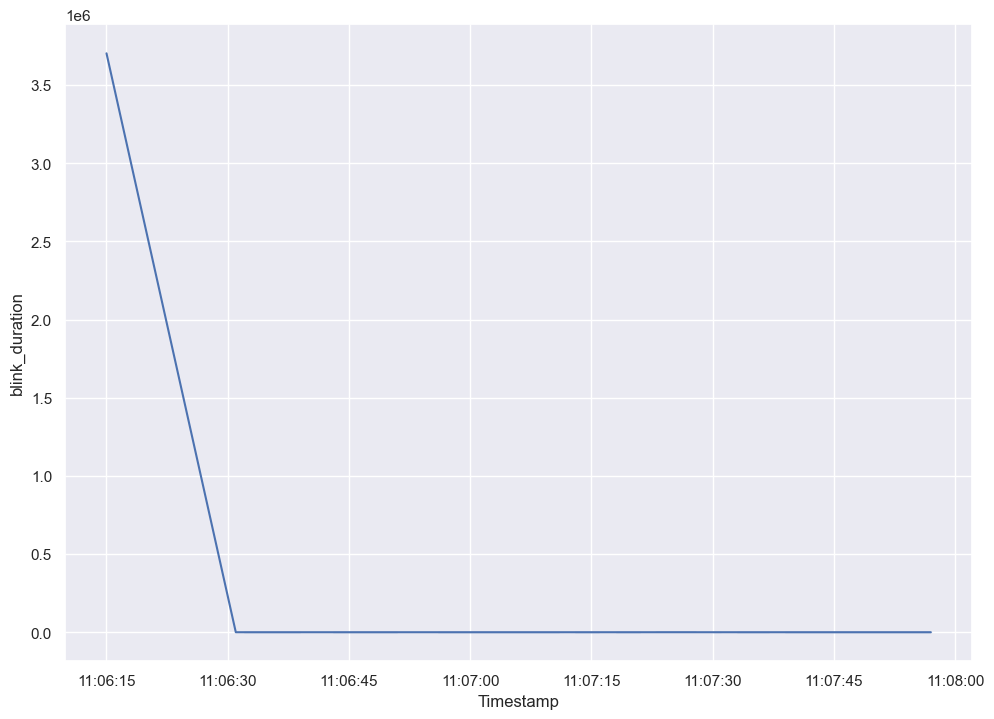

In [8]:
import seaborn as sns
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.Score = pd.to_numeric(data.Score)

data['mov_avg'] = data['Score'].rolling(7).sum()

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(
    x='Timestamp',
    y='blink_duration',
    data=data)



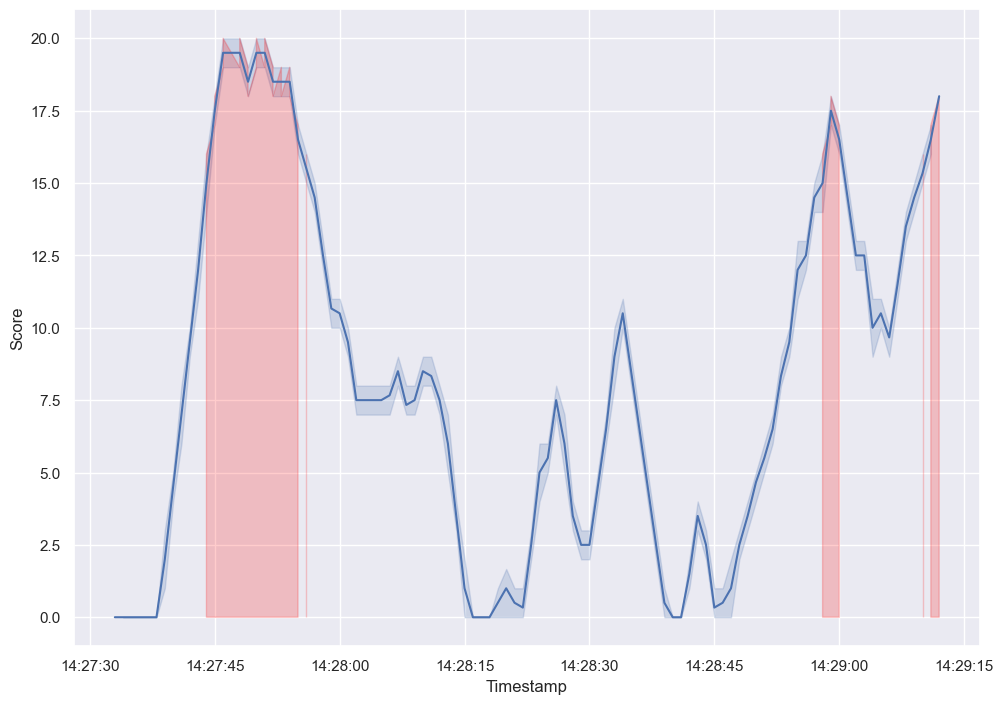

In [161]:
import seaborn as sns
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.Score = pd.to_numeric(data.Score)

data['mov_avg'] = data['Score'].rolling(7).sum()

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(
    x='Timestamp',
    y='Score',
    data=data)

# Highlight the area under the curve where Score > 15
ax.fill_between(data['Timestamp'], 0, data['Score'], where=(data['Score'] > 15), color='red', alpha=0.2)

In [23]:
import matplotlib.pyplot as plt


data=pd.read_csv("eye_log35.csv" )
y=data['Eye State']

In [24]:
x=data['Timestamp']
x

0      2023-11-23 11:37:57
1      2023-11-23 11:37:57
2      2023-11-23 11:37:58
3      2023-11-23 11:37:58
4      2023-11-23 11:37:58
              ...         
158    2023-11-23 11:39:13
159    2023-11-23 11:39:14
160    2023-11-23 11:39:15
161    2023-11-23 11:39:16
162    2023-11-23 11:39:16
Name: Timestamp, Length: 163, dtype: object

In [25]:
y=pd.Series.tolist(y)

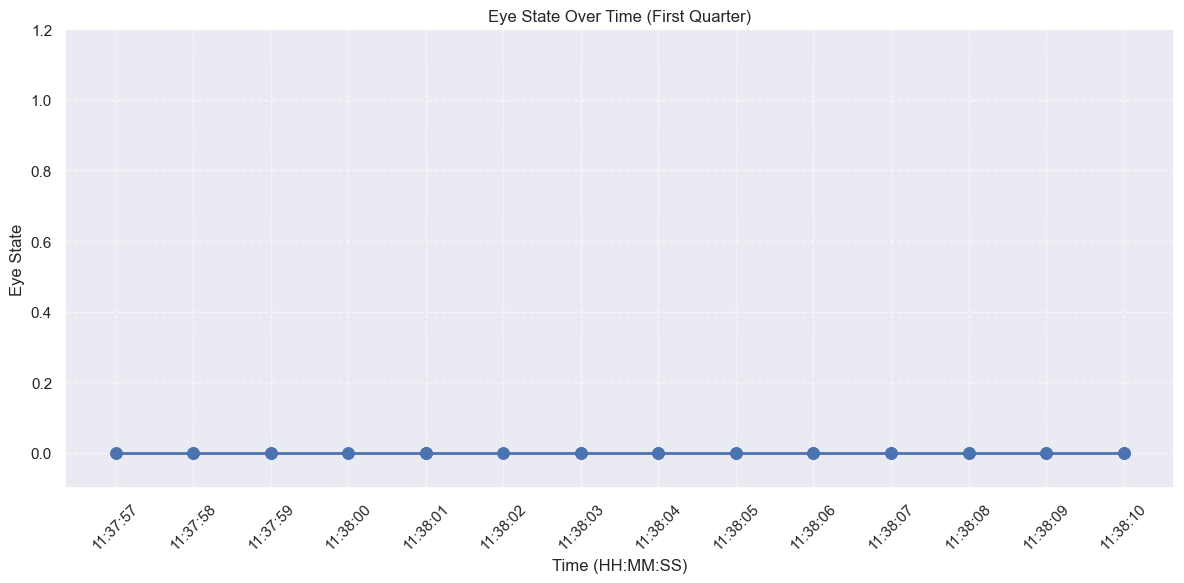

In [26]:
import matplotlib.pyplot as plt

# Convert the 'Timestamp' column to datetime objects
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the data
x = data['Timestamp']
y = data['Eye State']

# Format the Timestamp column to display hours, minutes, and seconds
x = x.dt.strftime('%H:%M:%S')

# Define the start and end indices for the first quarter of the data
start_index = 0
end_index = len(data) // 4  # Adjust as needed to control the range

# Subset the data for the first quarter
x = x[start_index:end_index]
y = y[start_index:end_index]

# Create a step plot for the first quarter
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.step(x, y, where='post', marker='o', markersize=8, linewidth=2, color='b')

# Add labels and title
plt.xlabel('Time (HH:MM:SS)')
plt.ylabel('Eye State')
plt.title('Eye State Over Time (First Quarter)')

# Customize the plot appearance
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid with dashed lines
plt.ylim(-0.1, 1.2)  # Set y-axis limits to better display binary data

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)


# Show the plot
plt.tight_layout()  # Ensures that labels and titles fit within the plot area
plt.show()
#next to best 

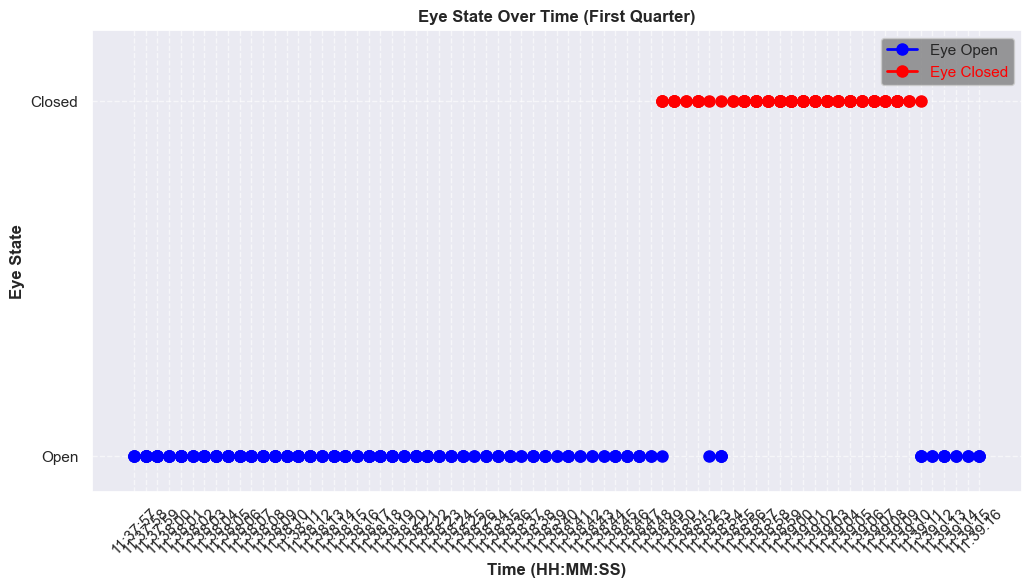

<Figure size 1170x827 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'Timestamp' column to datetime objects
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the data
x = data['Timestamp']
y = data['Eye State']

# Format the Timestamp column to display hours, minutes, and seconds
x = x.dt.strftime('%H:%M:%S')

# Define the start and end indices for the first quarter of the data
start_index = 0
end_index = len(data) // 1  # Adjust as needed to control the range

# Subset the data for the first quarter
x = x[start_index:end_index]
y = y[start_index:end_index]

# Create a step plot for the first quarter
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
for i in range(1, len(x)):
    if y.iloc[i] == 1 and y.iloc[i - 1] == 1:
        plt.plot(x.iloc[i-1:i+1], [1, 1], color='red', marker='o', markersize=8, linewidth=2)
    else:
        plt.plot(x.iloc[i-1:i+1], [0, 0], color='blue', marker='o', markersize=8, linewidth=2)

# Add labels and title with bold text
plt.xlabel('Time (HH:MM:SS)', weight='bold')
plt.ylabel('Eye State', weight='bold')
plt.title('Eye State Over Time (First Quarter)', weight='bold')

# Customize the plot appearance
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid with dashed lines
plt.ylim(-0.1, 1.2)  # Set y-axis limits to better display binary data

# Set y-axis labels explicitly
plt.yticks([0, 1], ['Open', 'Closed'])  # Change labels from 0, 1 to 'Open' and 'Closed'

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend for clarity

legend = plt.legend(['Eye Open', 'Eye Closed'], facecolor='grey')

# Set the color of 'Eye Closed' text to blue
legend.get_texts()[1].set_color('red')

# Set the color of 'Eye Closed' icon to red
legend.legend_handles[1].set_color('red')

# Show the plot
plt.show()

# Show the plot
plt.tight_layout()  # Ensures that labels and titles fit within the plot area
plt.show()


In [28]:
"""import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Read the data from the CSV file
#  data = pd.read_csv("eye_log11.csv")
eye_state_data = data['Eye State'].tolist()  # Convert the 'Eye State' column to a list
timestamps = pd.to_datetime(data['Timestamp'])  # Convert 'Timestamp' column to datetime objects

# Function to count consecutive ones with more than 3 occurrences and record timestamps
def count_consecutive_ones(data, timestamps):
    counts = []
    count = 0
    start_time = None  # Initialize start_time variable

    for i, value in enumerate(data):
        if value == 1:
            count += 1
            if start_time is None:
                start_time = timestamps[i]  # Set start_time if it's the beginning of a sequence
        else:
            if count > 3:  # Only count and append sequences with more than 3 consecutive ones
                counts.append((count, start_time, timestamps[i - 1]))  # Append count and start/end timestamps
            count = 0
            start_time = None  # Reset start_time

    if count > 3:
        counts.append((count, start_time, timestamps[-1]))  # Append count and start/end timestamps for the last sequence

    return counts

consecutive_ones = count_consecutive_ones(eye_state_data, timestamps)

# Create an interactive bar plot with Plotly
x_labels = [f"<b>{start.strftime('%H:%M:%S')} to {end.strftime('%H:%M:%S')}</b>" for _, start, end in consecutive_ones]
y_values = [count for count, _, _ in consecutive_ones]
colors = ['red' if count >= 15 else 'blue' for count in y_values]  # Set bar color based on count

fig = go.Figure(data=[go.Bar(
    x=x_labels,
    y=y_values,
    marker_color=colors,
    name='Bar Chart'
)])

# Create a line chart trace
line_trace = go.Scatter(
    x=x_labels,
    y=y_values,
    mode='lines+markers',
    line=dict(color='purple'),  # Line color
    name='Line Chart'
)

# Add the line chart trace to the figure
fig.add_trace(line_trace)

fig.update_layout(
    title="<i><b>Sleep Schedule</b></i>",
    xaxis_title='<b>Time Range</b>',
    yaxis_title='<b>Eye Closed in Seconds (not exactly in seconds)</b>',
    hovermode='x',  # Display count when hovering over bars
)

# Display the combined plot in the browser
fig.show()
"""

'import numpy as np\nimport pandas as pd\nimport plotly.graph_objects as go\n\n# Read the data from the CSV file\n#  data = pd.read_csv("eye_log11.csv")\neye_state_data = data[\'Eye State\'].tolist()  # Convert the \'Eye State\' column to a list\ntimestamps = pd.to_datetime(data[\'Timestamp\'])  # Convert \'Timestamp\' column to datetime objects\n\n# Function to count consecutive ones with more than 3 occurrences and record timestamps\ndef count_consecutive_ones(data, timestamps):\n    counts = []\n    count = 0\n    start_time = None  # Initialize start_time variable\n\n    for i, value in enumerate(data):\n        if value == 1:\n            count += 1\n            if start_time is None:\n                start_time = timestamps[i]  # Set start_time if it\'s the beginning of a sequence\n        else:\n            if count > 3:  # Only count and append sequences with more than 3 consecutive ones\n                counts.append((count, start_time, timestamps[i - 1]))  # Append count and 